## Equações algébricas lineares



**Conceitos envolvidos:** balanços materias em estado estacionário, com reciclo

No sistema com reciclo mostrado na figura abaixo, uma alimentação de $1000\space mols/h$, constituída de $1/3$ de $A$ e $\frac{2}{3}B$ , é misturada com a corrente de reciclo e reage de acordo com a seguinte estequiometria:

$A + B \rightarrow C$

No reator, $20\%$ de A que entram são convertidos em produtos, A corrente resultante é separada de modo que a corrente de reciclo contenha $80\%$ de A, $90\%$ de B e $10\%$ de C da corrente que entra no separador.

Determine todas as correntes do processo e suas composições, implementando:

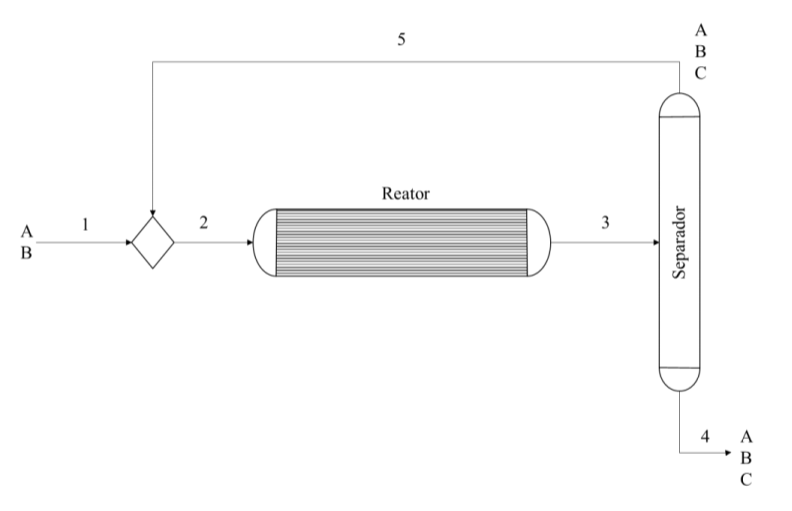

a)Método da eliminação Gaussiana

b)Método da decomposição LU

In [ ]:
#Bibliotecas
import numpy as np
import math

In [ ]:
# Matriz em lista

Nova = [[1,0,0,-1,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,1,0,0,-1,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,1,0,0,-1,0],
        [1,-1,0,0,0,0,0,0,0,0,0,0,-1],
        [0,0,0,0,1,-1,0,0,0,0,0,0,-1],
        [0,0,0,0,0,0,0,0,1,-1,0,0,1],
        [0,1,-1,-1,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,1,-1,-1,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,1,-1,-1,0],
        [0,-0.8,0,1,0,0,0,0,0,0,0,0,0],
        [0,0,0,0,0,-0.9,0,1,0,0,0,0,0],
        [0,0,0,0,0,0,0,0,0,-0.1,0,1,0],
        [-0.8,1,0,0,0,0,0,0,0,0,0,0,0]]

matriz = np.array(Nova)
B = np.array([333.4,666.7,0,0,0,0,0,0,0,0,0,0,0])
B = B.reshape(13,1)
Novo_B = list(B)

In [ ]:
#Eliminação Gaussiana

import math 
import numpy as np

def gaussPivoteamento(A, b):
  #acessar as linhas da matriz
  for i in range(len(A)):
    #verificando qual é o maior pivô
    pivo = math.fabs(A[i][i]) #diagonal
    linhapivo = i
    #vamos verificar qual é o maior elemento na primeira coluna
    for j in range(i+1,len(A)): #vai da linha abaixo que estamos até a ultima linha da matriz
      if math.fabs(A[j][i]) > pivo:
        pivo = math.fabs(A[j][i]) #alvinho - pq aqui é j i e nao i e j ???
        linhapivo = j
    #permutando as linhas
    if linhapivo !=i:
      linha_auxiliar = A[i] #recebe a linha atual da matriz
      A[i] = A[linhapivo] #a linha atual recebe a linha do pivo
      A[linhapivo] = linha_auxiliar #a linha do pivo recebe a linha auxiliar (que carrega a info da linha que estamos trabalhando)

      b_auxiliar = b[i] #recebe o b na linha que estamos trabalhando
      b[i] = b[linhapivo] #recebe o b da linha do pivo
      b[linhapivo] = b_auxiliar #finalizamos nossa troca

    #eliminacao gaussiana
    for m in range(i+1, len(A)):
      multiplicador = A[m][i]/A[i][i]#razao entre os numeros que estao abaixo do pivo mas na mesma coluna, dividido pelo pivo
      for n in range(i, len(A)): #representa agora as colunas
        A[m][n] -= multiplicador*A[i][n] #elemento da linha de cima mas na mesma coluna
      b[m] -= multiplicador*b[i]
  #printar matriz A escalonada e o vetor b escalonado
  for k in range(len(A)):
    print(A[k])
  print()
  print(np.array(b))
  solucao(A,b)

  
#Agora vamos criar uma função para achar a solução do nosso problema
def solucao(A,b):
  vetorsolucao= [] #nesse vetor vamos armazenar nossas respostas
  for i in range(len(A)):
    vetorsolucao.append(0) #criei o vetor com o mesmo tamanho da matriz A
  linha = len(A) - 1 #começo de baixo para cima
  while linha >= 0:
    x = b[linha]
    coluna = len(A) -1
    while coluna > linha:
      x -= A[linha][coluna]*vetorsolucao[coluna]
      coluna -= 1
    x/=A[linha][linha]
    linha -= 1
    vetorsolucao[coluna] = x
  vetorsolucao = np.array(vetorsolucao)
  #print(np.round(vetorsolucao))
  #print(vetorsolucao)
  vazoes = []
  for i in range(0,4):
    vazoes.append(vetorsolucao[i]+vetorsolucao[i+4]+vetorsolucao[i+8])
  vazoes = np.array(vazoes)
  
  #print(vazoes)
  for i in range(0,4):
    print('vazao',str(i+2),'=',vazoes[i])
  
  print('\n')

  #print(vetorsolucao)
  for i in range(0,len(vetorsolucao)):
    if (i<=3):
      print('Na '+str(i+2)+' = ',np.round(vetorsolucao[i],0))
    elif(i<=7):
      print("Nb "+str(i+2-4)+" = ",np.round(vetorsolucao[i],0))
    elif(i<=11):
      print("Nc "+str(i+2-8)+" = ",np.round(vetorsolucao[i],0))
    else:
      print("Grau de Avanço = ",np.round(vetorsolucao[i],0))

  print('\n')
  y = []
  for j in range(0,len(vetorsolucao)-1,4):
    Ya = vetorsolucao[j]/vazoes[0]
    Yb = vetorsolucao[j+1]/vazoes[1]
    Yc = vetorsolucao[j+2]/vazoes[2]
    Yd = vetorsolucao[j+3]/vazoes[3]
    y.append(Ya)
    y.append(Yb)
    y.append(Yc)
    y.append(Yd)
  
  for i in range(0,len(y)):
    if (i<=3):
      print('Xa '+str(i+2)+' = ',np.round(y[i],3))
    elif(i<=7):
      print("Xb "+str(i+2-4)+" = ",np.round(y[i],3))
    elif(i<=11):
      print("Xc "+str(i+2-8)+" = ",np.round(y[i],3))




In [ ]:
print('\nGauss Pivoteamento')
print(gaussPivoteamento(Nova,Novo_B),"\n")


Gauss Pivoteamento
[1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0]
[0.0, 0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0]
[0.0, 0.0, 0.0, 0.19999999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8]
[0.0, 0.0, 0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999999999998, 0.0, 0.0, 0.0, 0.0, 0.9]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, -1.0, 0.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, -0.1]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.8]

[[ 333.4 ]
 [-333.4 ]
 [-333.4 ]
 [ 266.72]
 [   0.  ]
 [   0.  ]
 [ 666.7 ]
 [ 600.03]
 [   0.  ]
 

In [ ]:
# Matriz Lu 
def LU(A):
  n = len(A)
  x = [0]*n
  # Calculo dos pivos.
  for k in list(range(1,n,1)):
    # Calculo dos multiplicadores.
    for i in list(range(k+1,n+1,1)):
      m = A[i-1][k-1]/A[k-1][k-1]
      A[i-1][k-1] = m
      # Atualizar demais valores da linha
      for j in list(range(k+1,n+1,1)):
        A[i-1][j-1] = A[i-1][j-1]-m*A[k-1][j-1] 
  return A

# Resolve o sistema triangular inferior.
def solveLowerTriangular(L,b):
  n = len(b)
  y = [0]*n
  for i in list(range(1,n+1,1)):
    s = 0
    for j in list(range(1,i,1)):
      s = s + L[i-1][j-1]*y[j-1]
    y[i-1] = b[i-1] - s
  return y

# Resolve o sistema triangular superior.
def solveUpperTriangular(U,b):
  n = len(b)
  x = [0]*n
  x[n-1] = b[n-1]/U[n-1][n-1]
  for i in list(range(n-1,0,-1)):
    s = 0
    for j in list(range(i+1,n+1,1)):
      s = s + U[i-1][j-1]*x[j-1]
    x[i-1] = (b[i-1]-s)/(U[i-1][i-1])

  return x

In [ ]:
# Print dos resultados

Teste = LU(Nova)
print("Matriz A, método LU\n")
for i in range(0,len(Teste)):
  print(Teste[i])

#Triangulo  Inferior
Teste02 = solveLowerTriangular(Teste,Novo_B)
Teste02 = np.array(Teste02)
print("\nTriangulo de Inferior")
for i in range(0,len(Teste02)):
  if (i<=3):
    print("na "+str(i+2)+" = ",np.round(Teste02[i],0))
  elif(i<=7):
    print("nb "+str(i+2-4)+" = ",np.round(Teste02[i],0))
  elif(i<=11):
    print("nc "+str(i+2-8)+" = ",np.round(Teste02[i],0))
  else:
    print("Grau de Avanço "+str(i+1)+" = ",np.round(Teste02[i],0))

#Triangulo Superior
print("\nTriangulo Superior")
Teste03 = solveUpperTriangular(Teste,Teste02)
Teste03 = np.array(Teste03)
print(Teste03)



Matriz A, método LU

[1, 0, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.0, -1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0]
[0.0, -0.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0]
[0.0, -0.0, -0.0, 0.19999999999999996, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8]
[0.0, -0.0, -0.0, 0.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0]
[0.0, -0.0, -0.0, 0.0, 0.0, 1.0, -1.0, -1.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]
[0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.09999999999999998, 0.0, 0.0, 0.0, 0.0, 0.9]
[0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, -1.0, 0.0]
[0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, -1.0, 0.0]
[0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.0, 0.0, 1.0]
[0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.9, -0.1]
[0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -1.8]

Triangulo de Inferior
na 2 =  [926.]
na 3 =  [741.]
na 4 =  [148.]
na 5 =  [

In [ ]:
# Frações molares
Corrente = []
for i in range(0,4):
  Corrente.append(Teste02[i]+Teste02[i+4]+Teste02[i+8])
Corrente = np.array(Corrente)
for j in range(0,4):
  print(np.round(Corrente[j],0),"mols/h")

print("\nVazões")
for j in range(0,len(Teste02)):
    if (j <=3):
      print("Na"+str(j+2)," = ",Teste02[j])
    elif (j <= 7):
      print("Nb"+str(j+2-4)," = ",Teste02[j])
    elif (j <= 11):
      print("Nc"+str(j+2-8)," = ",Teste02[j])


print("\nFrações Molares")
y = []
for j in range(0,len(Teste02)-1,4):
  Ya = Teste02[j]/Corrente[0]
  Yb = Teste02[j+1]/Corrente[1]
  Yc = Teste02[j+2]/Corrente[2]
  Yd = Teste02[j+3]/Corrente[3]
  y.append(Ya)
  y.append(Yb)
  y.append(Yc)
  y.append(Yd)

y = np.array(y)
for l in range(0,len(y)):
  if (l <=3):
    print("Xa"+str(l+2)," = ",y[l])
  elif (l <= 7):
    print("Xb"+str(l+2-4)," = ",y[l])
  elif (l <= 11):
    print("Xc"+str(l+2-8)," = ",y[l])
  


[5947.] mols/h
[5761.] mols/h
[815.] mols/h
[4947.] mols/h

Vazões
Na2  =  [926.11111111]
Na3  =  [740.88888889]
Na4  =  [148.17777778]
Na5  =  [592.71111111]
Nb2  =  [5000.]
Nb3  =  [4814.77777778]
Nb4  =  [481.47777778]
Nb5  =  [4333.3]
Nc2  =  [20.58024691]
Nc3  =  [205.80246914]
Nc4  =  [185.22222222]
Nc5  =  [20.58024691]

Frações Molares
Xa2  =  [0.15573553]
Xa3  =  [0.12859374]
Xa4  =  [0.18184049]
Xa5  =  [0.11982213]
Xb2  =  [0.84080368]
Xb3  =  [0.83568577]
Xb4  =  [0.59085889]
Xb5  =  [0.87601738]
Xc2  =  [0.00346079]
Xc3  =  [0.03572048]
Xc4  =  [0.22730062]
Xc5  =  [0.00416049]
